## Decision Trees and Random Forest

In [2]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('kyphosis.csv')
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
Kyphosis    81 non-null object
Age         81 non-null int64
Number      81 non-null int64
Start       81 non-null int64
dtypes: int64(3), object(1)
memory usage: 2.6+ KB


In [25]:
df['Kyphosis'].value_counts()

absent     64
present    17
Name: Kyphosis, dtype: int64

/home/sudhir/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


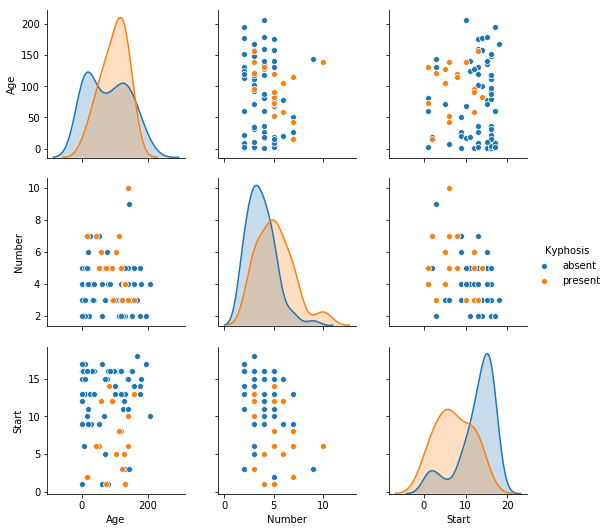

In [5]:
sns.pairplot(df,hue='Kyphosis')

In [6]:
from sklearn.cross_validation import train_test_split
X = df.drop('Kyphosis',axis=1)
y = df['Kyphosis']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)

/home/sudhir/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [7]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [8]:
prediction = dtree.predict(X_test)

In [9]:
from sklearn.metrics import classification_report, confusion_matrix
print('confusion_matrix\n',confusion_matrix(y_test, prediction))
print('\n classification_report\n',classification_report(y_test, prediction))

confusion_matrix
 [[16  2]
 [ 3  4]]

 classification_report
              precision    recall  f1-score   support

     absent       0.84      0.89      0.86        18
    present       0.67      0.57      0.62         7

avg / total       0.79      0.80      0.80        25



In [9]:
from sklearn.tree import export_graphviz
import graphviz
features = list(df.columns[1:])
features

['Age', 'Number', 'Start']

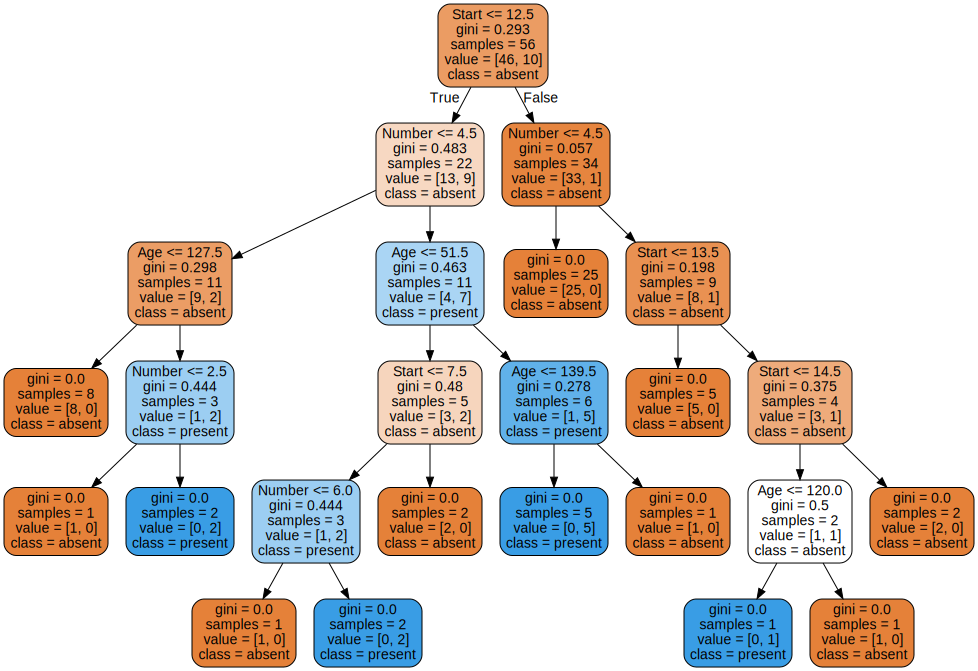

In [10]:
dot_data = export_graphviz(
    dtree,out_file=None,
    feature_names = features,
    class_names = df['Kyphosis'].unique(),
    rounded = True,
    filled = True
)

graph = graphviz.Source(dot_data)
graph

In [10]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(df.columns[1:])
features

['Age', 'Number', 'Start']

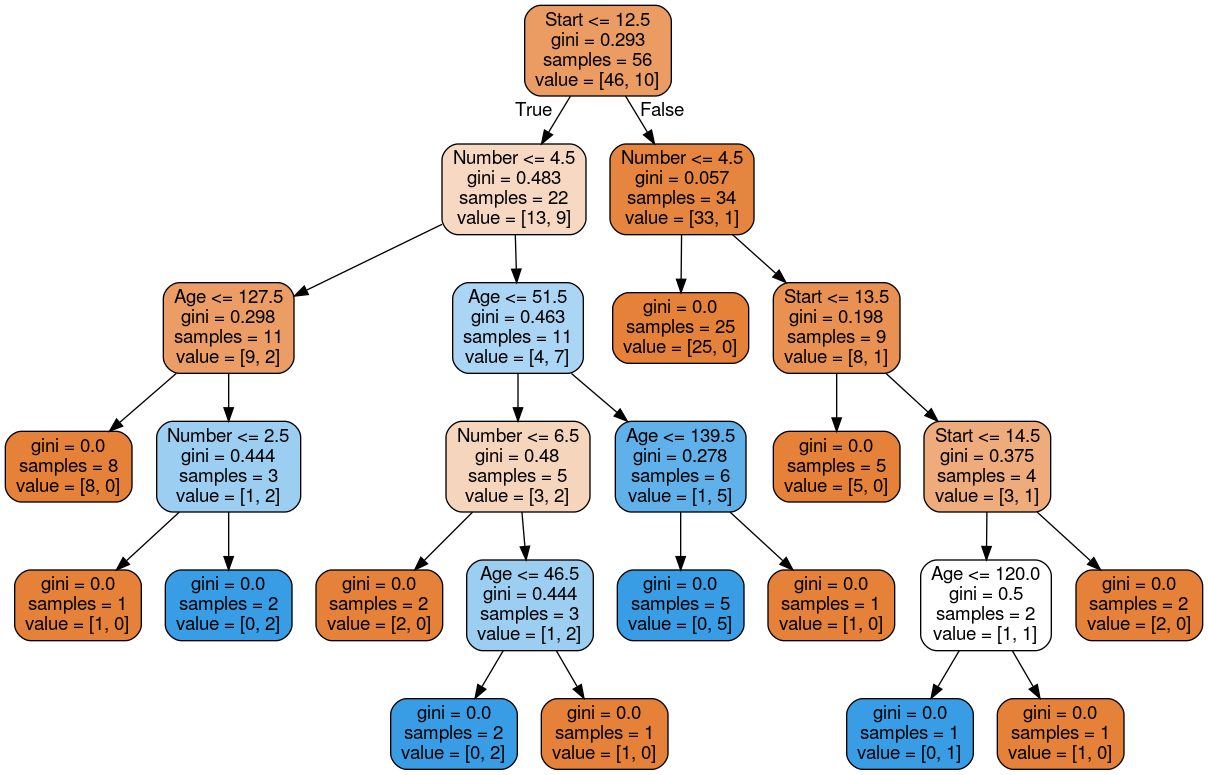

In [11]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())  

## Random Forest

In [13]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200,random_state=0)
rfc.fit(X_train,y_train)

/home/sudhir/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [14]:
rfc_pred = rfc.predict(X_test)

In [15]:
print('confusion_matrix \n',confusion_matrix(y_test, rfc_pred))
print('\n classification_report\n',classification_report(y_test, rfc_pred))

confusion_matrix 
 [[17  1]
 [ 6  1]]

 classification_report
              precision    recall  f1-score   support

     absent       0.74      0.94      0.83        18
    present       0.50      0.14      0.22         7

avg / total       0.67      0.72      0.66        25



### Decision Trees and Random Forests Project

In [72]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

In [73]:
df = pd.read_csv('loan_data.csv')
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [10]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


### Exploratory Data analysis

Text(0.5,0,'fico')

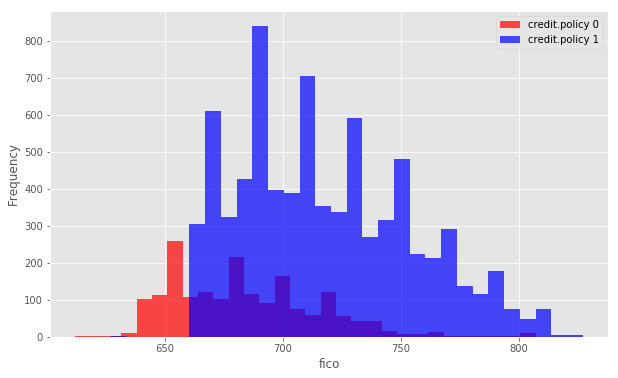

In [32]:
plt.figure(figsize=(10,6))
df[df['credit.policy']==0]['fico'].plot(kind='hist',bins=30,color='r',alpha=0.7,label='credit.policy 0')
df[df['credit.policy']==1]['fico'].plot(kind='hist',bins=30,color='b', alpha=0.7,label='credit.policy 1')
plt.legend()
plt.xlabel('fico')

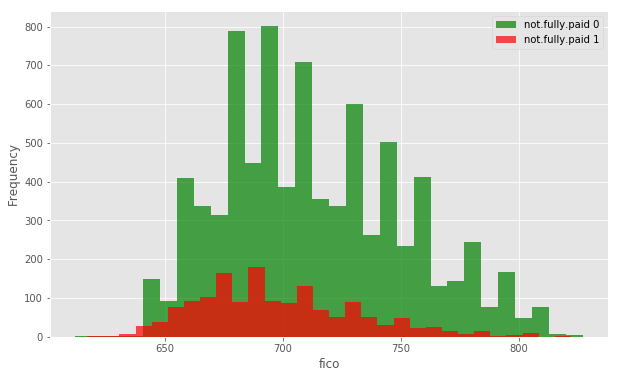

In [75]:
plt.figure(figsize=(10,6))
df[df['not.fully.paid']==0]['fico'].plot(kind='hist',bins=30,color='g',alpha=0.7,label='not.fully.paid 0')
df[df['not.fully.paid']==1]['fico'].plot(kind='hist',bins=30,color='r', alpha=0.7,label='not.fully.paid 1')
plt.xlabel('fico')
plt.legend()

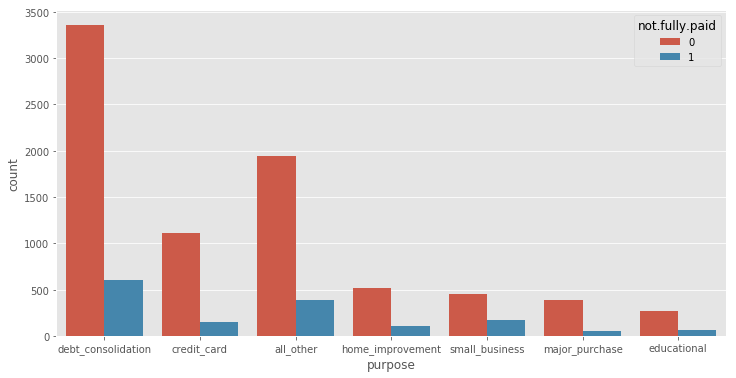

In [36]:
plt.figure(figsize=(12,6))
sns.countplot(x = 'purpose',data =df,hue ='not.fully.paid')

/home/sudhir/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


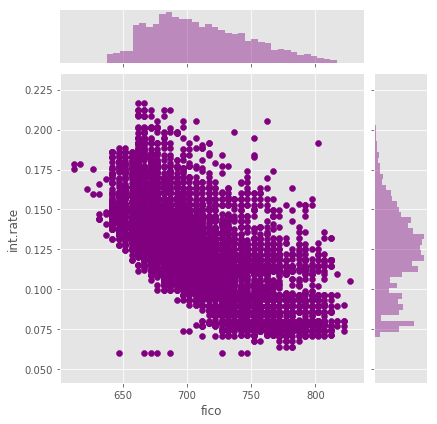

In [76]:
sns.jointplot(x='fico',y='int.rate', data=df,color='purple')

/home/sudhir/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


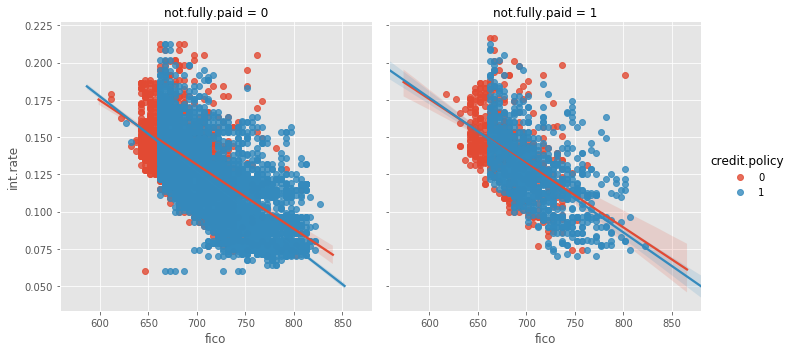

In [43]:
sns.lmplot(x = 'fico', y='int.rate', col='not.fully.paid', hue='credit.policy',data =df)

In [77]:
cat_feat = ['credit.policy','purpose','inq.last.6mths','delinq.2yrs','pub.rec']

In [78]:
X_new = pd.get_dummies(df,drop_first=True,columns=cat_feat)
y = df['not.fully.paid']

In [79]:
X_new.head()

,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,not.fully.paid,credit.policy_1,...,delinq.2yrs_6,delinq.2yrs_7,delinq.2yrs_8,delinq.2yrs_11,delinq.2yrs_13,pub.rec_1,pub.rec_2,pub.rec_3,pub.rec_4,pub.rec_5
0,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,...,0,0,0,0,0,0,0,0,0,0


### Train test split

In [80]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new,y, test_size=0.3,random_state=0)

### Decision tree model

In [81]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion='entropy',random_state=0)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

### Prediction and evaluvation

In [82]:
prediction = dtree.predict(X_test)

In [83]:
from sklearn.metrics import classification_report,confusion_matrix
print('confusion_matrix\n',confusion_matrix(y_test,prediction))
print('classification_report\n',classification_report(y_test,prediction))

confusion_matrix
 [[2406    0]
 [   0  468]]
classification_report
              precision    recall  f1-score   support

          0       1.00      1.00      1.00      2406
          1       1.00      1.00      1.00       468

avg / total       1.00      1.00      1.00      2874



### Train the Random forest model

In [90]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state =0)
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

### Prediction ans Evaluvation

In [91]:
prediction = rfc.predict(X_test)

In [92]:
print('confusion_matrix\n',confusion_matrix(y_test,prediction))
print('classification_report\n',classification_report(y_test,prediction))

confusion_matrix
 [[2406    0]
 [   0  468]]
classification_report
              precision    recall  f1-score   support

          0       1.00      1.00      1.00      2406
          1       1.00      1.00      1.00       468

avg / total       1.00      1.00      1.00      2874



### Great Job